# BLG454E Learning From Data Homework 1

#### You are given several problems below. Some of them are to be solved on a paper and uploaded as an image file while the rest are coding problems. Make sure to keep your answers illustrative and show your work clearly. If you have any questions, send an e-mail at sentop22@itu.edu.tr.

# Hand-Solving Problems (40 points)

### These problems should be solved on an actual paper with your hand writing. Show your steps clearly.

## Problem 1 (20 points)

1. Define machine learning and explain the difference between supervised, unsupervised, and reinforcement learning. Give example applications of each. (5 points)

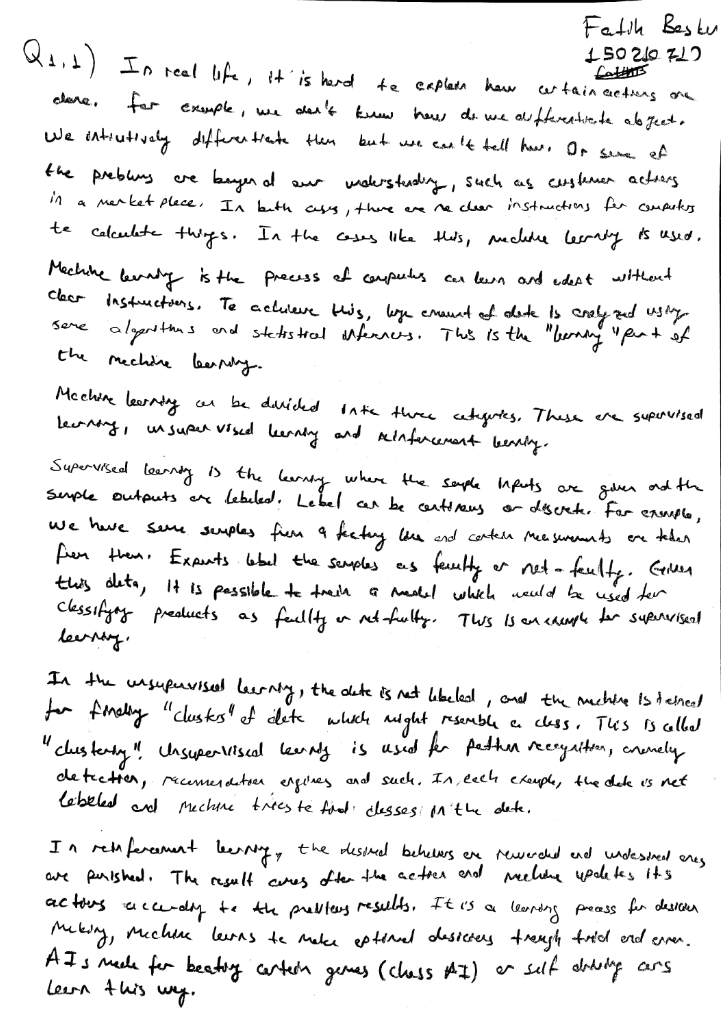

2. Differentiate between the training and testing phases in supervised learning. (5 points)

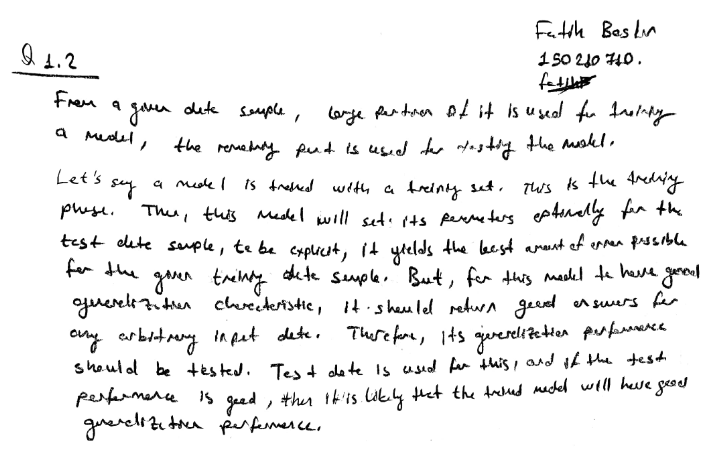

3. Describe the basic idea of linear regression and its applications. (5 points)

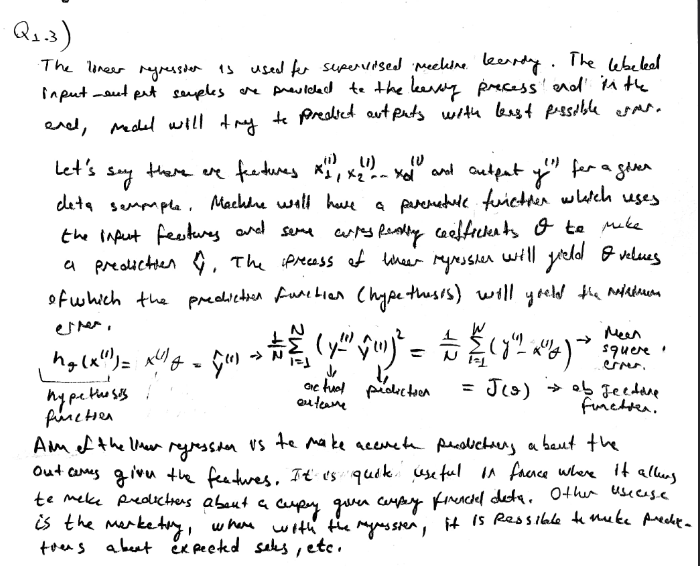

4. Given the set of data points below, calculate the coefficients (slope and intercept) of a simple linear regression model by hand. (5 points)

    Data points: {(2,5), (3,8), (4,7), (5,10), (6,12), (7,14), (8,15)}
    
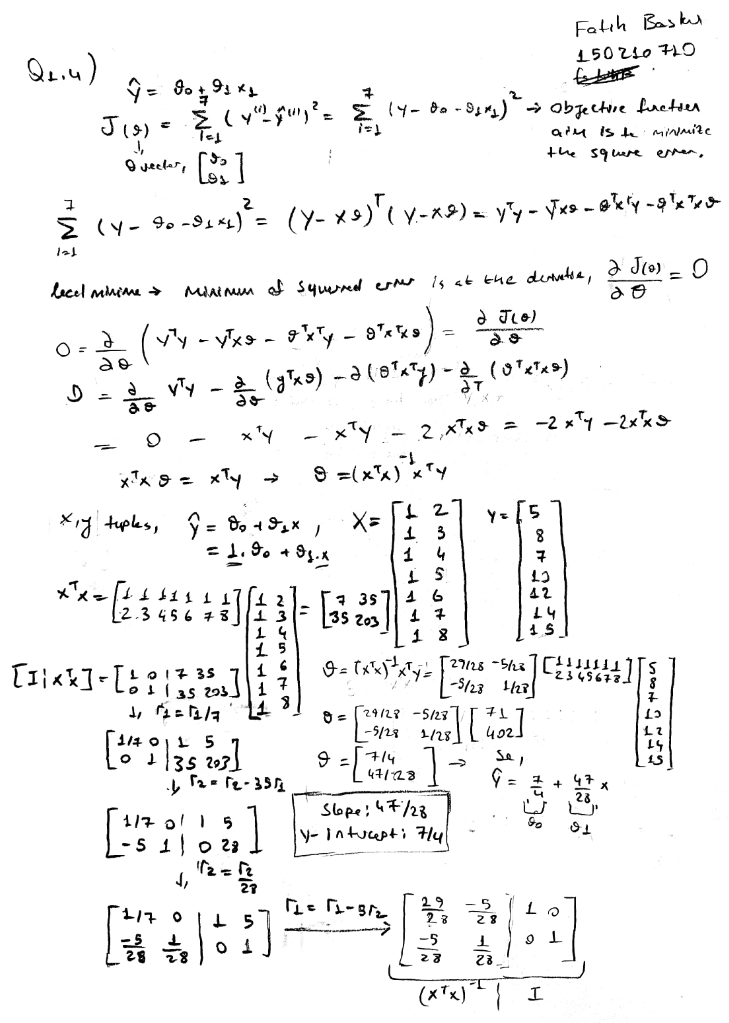

## Problem 2 (10 points)

1. Explain the concept of maximum likelihood estimation (MLE) in the context of parameter estimation. (5 points)

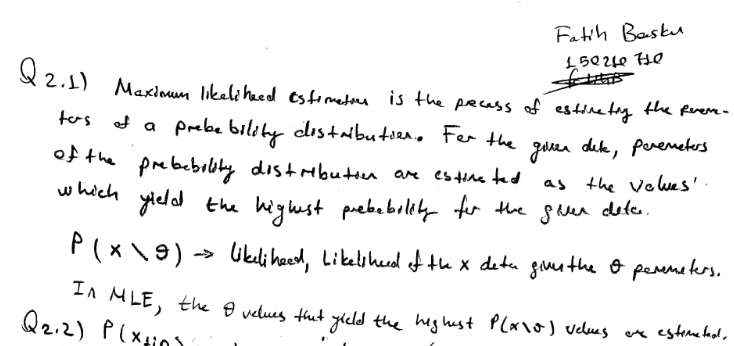

2. Given a dataset and a likelihood function, compute the MLE of a parameter (e.g., mean of a Gaussian distribution). (5 points)

    Likelihood function for Gaussian Distribution: $L(\mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$

    Calculate MLE of $\mu$ and $\sigma$ by finding derivatives and setting them to zero. Run below cell to generate the dataset.

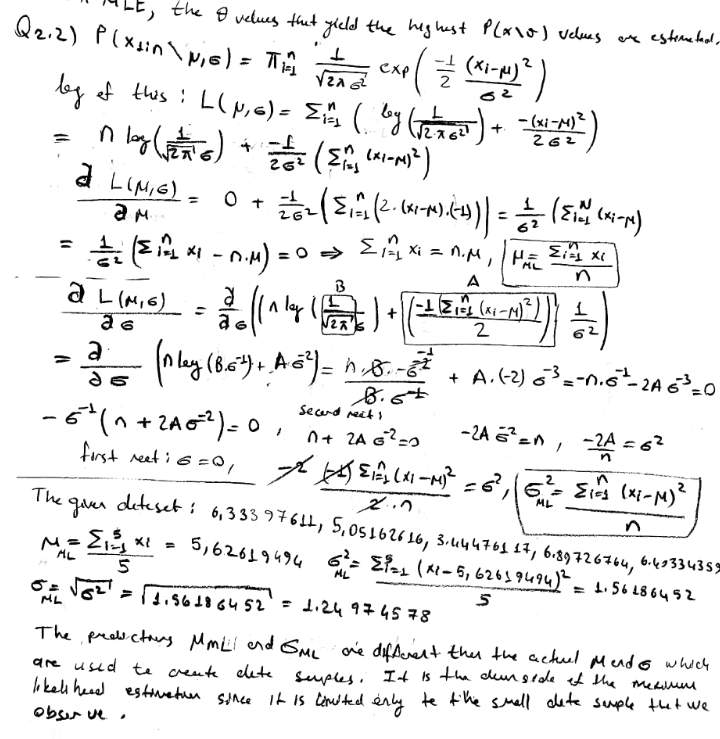

In [1]:
# Fatih Baskın
# 150210710

import numpy as np
# I imported sqrt function to use it in the code below.
from math import sqrt

# Set the random seed for reproducibility
np.random.seed(23)

# Generate a random dataset with 5 samples from a Gaussian distribution
mean = 5  # True mean
std_dev = 2  # Known standard deviation
sample_size = 5
dataset = np.random.normal(mean, std_dev, sample_size)

# This is the code I added.
print(dataset)
calc_mean = 0.0
for i in dataset: calc_mean += i
calc_mean /= sample_size
calc_var = 0.0
for i in dataset: calc_var += (i - calc_mean)**2
calc_var /= sample_size
calc_std = sqrt(calc_var)
print("%0.8f %0.8f %0.8f"%(calc_mean, calc_var, calc_std))

[6.33397611 5.05162616 3.44476117 6.89726764 6.40334359]
5.62619494 1.56186452 1.24974578


## Problem 3 (10 points)

1. Describe the principles of Bayesian decision theory in classification. (5 points)

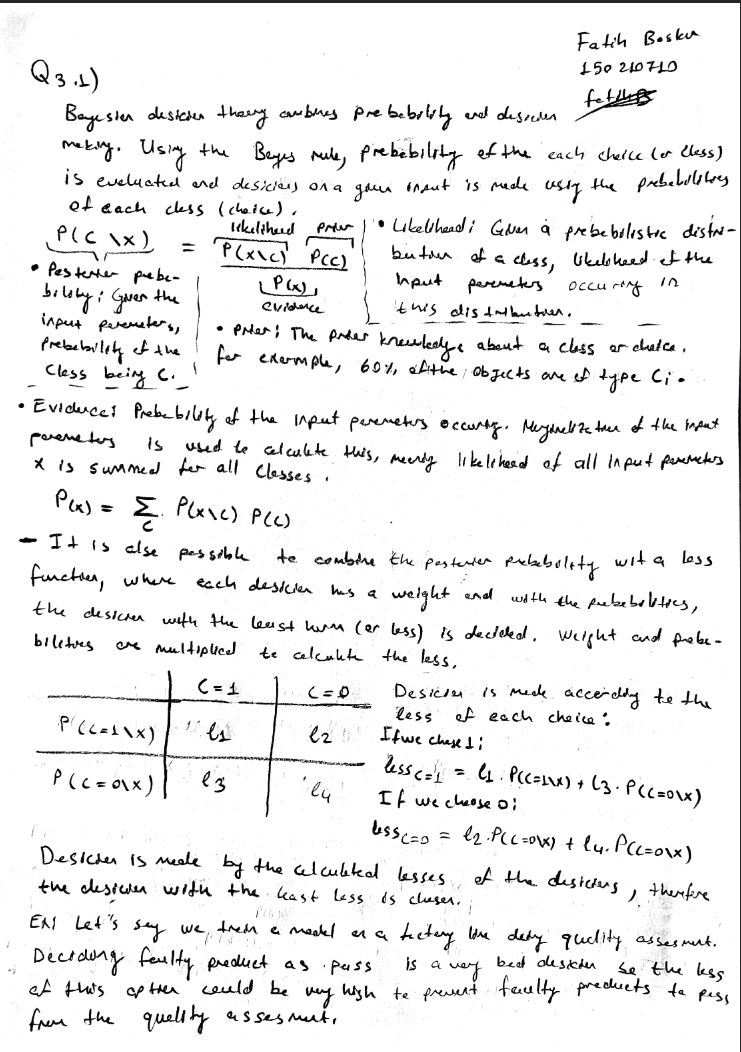

2. You are a medical doctor working in a clinic. A patient has just undergone a medical test to determine whether they have a particular medical condition. The test has two possible outcomes: "Positive" (indicating the presence of the condition) and "Negative" (indicating the absence of the condition). The test is known to be accurate but not perfect, meaning it can produce false positive and false negative results.

    Here are the test characteristics:

    Sensitivity: The probability of the test being "Positive" when the patient has the condition is 0.95 (95% sensitivity).
    Specificity: The probability of the test being "Negative" when the patient does not have the condition is 0.90 (90% specificity).
    Given the prevalence of the medical condition in the general population, which is 0.05 (5%), you are asked to use Bayes' Rule to calculate the probability that the patient actually has the condition when the test result is "Positive." Make sure to clearly define the events before calculating the probabilities. (5 points)

    Posterior Probability: $P(C | x) = \frac{P(x | C)P(C)}{P(x)}$

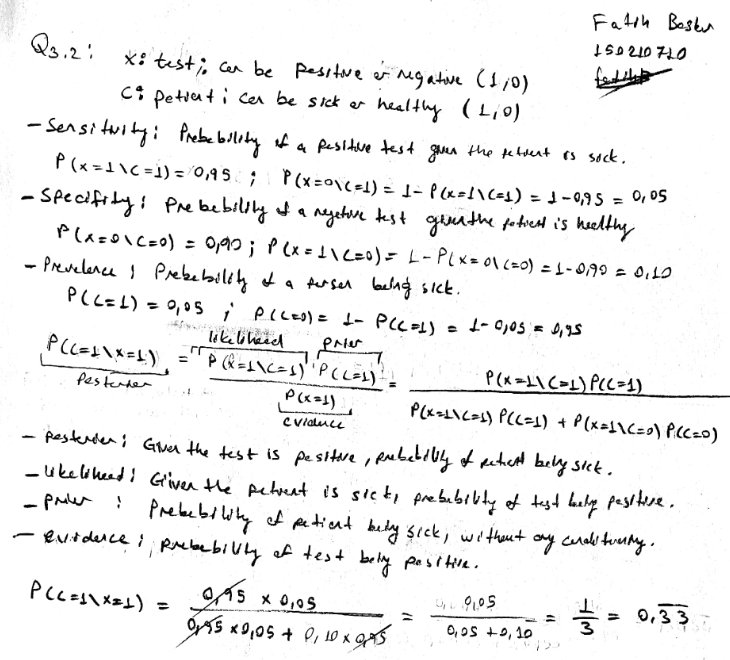

Insert your solution page here.

# Coding-Related Problems (60 points)

### Run below cell to import the libraries and load the Iris dataset that you will be using for the following problems (for problem 7 you will use the Digits dataset). Do not use any other libraries unless they are built in.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

## Problem 4 (5 Points)

Implement a simple linear regression model in Python from scratch, including gradient descent for parameter estimation. (5 points)

The hypothesis (prediction function) is $\hat{y} = \theta_0 + \theta_1 x$ where $\theta_0$ is the y-intercept and $\theta_1$ is the slope. Then the objective function: $J(\theta) = \frac{\Sigma^{N}_{i = 1}(y^{(i)} - \hat{y}^{(i)})^2}{2N} = \frac{\Sigma^{N}_{i = 1} (y^{(i)} - \theta_0 + \theta_1)^2}{2N}$


$\nabla J(\theta_0) = \frac{\Sigma^{N}_{i = 1} y^{(i)} - \theta_0 - x^{(i)}\theta_1 }{N}$

$\nabla J(\theta_1) = \frac{\Sigma^{N}_{i = 1} x^{(i)}y^{(i)} - x^{(i)}\theta_0 - (x^{(i)})^2\theta_1 }{N}$

Gradient descent: $\theta^{t+1} = \theta^t - (\alpha \times \nabla J(\theta^t))$

Value found by $\theta = (X^T X)^{-1} X^T y : $ 
[[ 3.41894684]
 [-0.0618848 ]]

 Gradient vector: $\frac{\partial J(\theta)}{\partial \theta} = X^T y - X^T X \theta$
 

y_hat =  0.47714801792925904 x +  0.2081213547768629


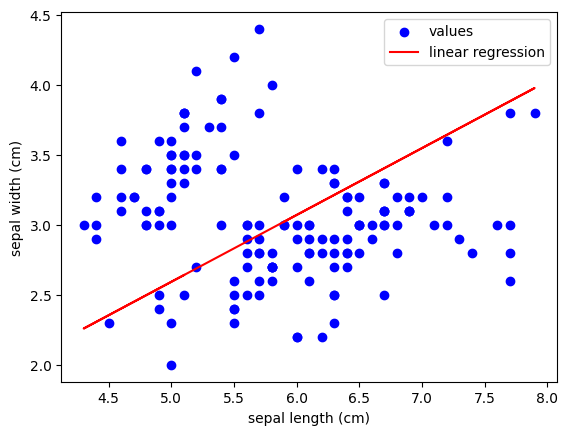

In [3]:
# Fatih Baskın
# 150210710

# Sepal lenght is the independent variable x, iris.data[0]
# Sepal width is the dependent variable y iris.data[1]

# Features, x_i
features = iris.data[:, 0:1]

# Targets, y_i
targets = iris.data[:, 1:2]


def simple_linear_regression(X, y, learning_rate, num_iterations):  
   # X = n x d
   # y = n x 1
   # m_xi = d x 1
   
   # In our case n = 150, d = 1
   n, d = X.shape

   # y'_i = mx_i + b   
   m = np.zeros((d,))
   b = 0.0

   for iteration in range (0, num_iterations):
      # derivatives
      d_m = np.zeros((d,))
      d_b = 0.0
      # calculate derivative for each row and sum them
      for row in range(0, n):
         # error function, prediction - actual value
         error = (np.dot(X[row], m) + b) - y[row]
         # derivative of the constant value is equal to sum of errors
         d_b += error
         d_m += (error * X[row])
      # normalizing derivatives with n
      d_m /= n
      d_b /= n
      # gradient descent
      m -= learning_rate * d_m
      b -= learning_rate * d_b
   return m, b

# Chosing the learning rate small, with high iteration count
m, b = simple_linear_regression(features, targets, 1e-3, 2000)

# A line equation for predictions
def prediction(m, b, X):
   n = X.shape[0]
   predictions = np.zeros(n)
   for iteration in range(0, n):
      predictions[iteration] = np.dot(X[iteration], m) + b[0]
   return predictions

print("y_hat = ", m[0], "x + ", b[0])

y_hat = prediction(m, b, features)
plt.scatter(features, targets, marker='o', c='b', label = 'values')
plt.plot(features, y_hat, c='r', label='linear regression')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

## Problem 5 (20 Points)

Implement a K-Nearest Neighbors (KNN) classifier in Python for a classification problem. Additionally, incorporate cross-validation to assess the model's performance.

1. Implement the KNN classifier and use k-fold cross-validation to evaluate the KNN classifier. You can specify the number of folds (e.g., 5-fold cross-validation). (5 points)
2. Calculate and report the average accuracy of the model across the cross-validation folds. (5 points)
3. Plot your classification for 3 different values of `k`. (5 points)
4. Discuss how the choice of `k` impacts the model's performance. (5 points)

In [4]:
# Fatih Baskın
# 150210710

def knn_classifier_with_cv(X, y, k, num_folds=5):
    accuracies = []

    # getting the dimensions
    n = X.shape[0]
    # d = X.shape[1]

    for fold in range(num_folds):
        # In each iteration, elements with indexes 0,5,10.. or 1,6,11 or 2,7,12.. will be chosen as test sample.
        test_data_sample = X[fold:n:num_folds, :]
        test_target_sample = y[fold:n:num_folds, :]

        # Number of test samples
        test_samples_num = test_data_sample.shape[0]

        # Remaining data sample will be used for training.
        mask = np.ones(n, bool)
        for i in range(fold, n, num_folds):
            mask[i] = 0
        training_data_sample = X[mask]
        training_target_sample = y[mask]

        training_sample_num = training_data_sample.shape[0]

        # predictions of the test samples.
        predictions = np.zeros(test_samples_num, int)

        # find k nearest neighbour of each test sample from the training sample.
        for i in range(test_samples_num):
            # each row having the squared numbers of elements
            # to calculate the euclidean distance
            test_row_matrix = np.atleast_2d(
                test_data_sample[i]).repeat(training_sample_num, axis=0)
            squared_differances = np.square(
                test_row_matrix - training_data_sample)
            squared_differances_sum = np.sum(squared_differances, axis=1)
            euclidean_distance = np.sqrt(squared_differances_sum)

            # merge with class labels
            distance_class = np.c_[euclidean_distance, training_target_sample]

            # sort by distances
            distance_class = distance_class[distance_class[:, 0].argsort()]

            # select nearest k and map their frequencies
            freq = {}
            for ki in range(0, k):
                ki_class = distance_class[ki][1]
                if ki_class in freq:
                    freq[ki_class] += 1
                else:
                    freq[ki_class] = 1

            # predicted class is the key with max frequency
            prediction = max(freq, key=freq.get)

            # add current prediction to predictions
            predictions[i] = prediction == test_target_sample[i][0]

        # obtain accuracy from the predictions
        accuracies.append(sum(predictions)/len(predictions))

    # TODO: Implement KNN classifier with k-fold cross-validation here. Calculate accuracies for each fold and store them in the 'accuracies' list.

    avg_accuracy = sum(accuracies) / len(accuracies)
    return avg_accuracy

In [5]:
# Fatih Baskın
# 150210710

X_iris = iris.data[:, 0:4]
y_iris = np.atleast_2d(iris.target).reshape(-1, 1)

# Data normalization
# minimums of each columns
mins = X_iris.min(0)

# maximums of each columns
maxs = X_iris.max(0)

# 150 rows containing minimums of each column
min_matrix = np.atleast_2d(mins).repeat(repeats=X_iris.shape[0], axis=0)

# 150 rows containing maxs - mins of each column
max_min_matrix = np.atleast_2d(maxs - mins).repeat(repeats=X_iris.shape[0], axis=0)

# We need to normalize the data since euclidean distance would be faulty.
# 0 <= (x_i - min) / (max - min) <=
X_iris_normalized = np.divide((X_iris - min_matrix), max_min_matrix, where=max_min_matrix!=0)

knn_k = [3,5,10,15,20,30,40,50,75]
knn_fold = [3,5,10]
for f in knn_fold:
    for k in knn_k:
        avg_accuracy = knn_classifier_with_cv(X_iris_normalized, y_iris, k, f)
        print(f"Average accuracy with k={k} with {f}-fold cross valitadion: {avg_accuracy}")

Average accuracy with k=3 with 3-fold cross valitadion: 0.9533333333333333
Average accuracy with k=5 with 3-fold cross valitadion: 0.96
Average accuracy with k=10 with 3-fold cross valitadion: 0.9666666666666667
Average accuracy with k=15 with 3-fold cross valitadion: 0.9533333333333333
Average accuracy with k=20 with 3-fold cross valitadion: 0.96
Average accuracy with k=30 with 3-fold cross valitadion: 0.9466666666666667
Average accuracy with k=40 with 3-fold cross valitadion: 0.9266666666666666
Average accuracy with k=50 with 3-fold cross valitadion: 0.9066666666666666
Average accuracy with k=75 with 3-fold cross valitadion: 0.7200000000000001
Average accuracy with k=3 with 5-fold cross valitadion: 0.9533333333333334
Average accuracy with k=5 with 5-fold cross valitadion: 0.9600000000000002
Average accuracy with k=10 with 5-fold cross valitadion: 0.9533333333333334
Average accuracy with k=15 with 5-fold cross valitadion: 0.9666666666666668
Average accuracy with k=20 with 5-fold cross

#### Results

| k    | 3-fold Cross-Validation Accuracy | 5-fold Cross-Validation Accuracy | 10-fold Cross-Validation Accuracy |
|------|----------------------------------|----------------------------------|-----------------------------------|
| 3    | 0.95333333                       | 0.95333333                       | 0.95333333                        |
| 5    | 0.96000000                       | 0.96000000                       | 0.96000000                        |
| 10   | 0.96666667                       | 0.95333333                       | 0.95333333                        |
| 15   | 0.95333333                       | 0.96666667                       | 0.97333333                        |
| 20   | 0.96000000                       | 0.96000000                       | 0.96000000                        |
| 30   | 0.94666667                       | 0.96000000                       | 0.96666667                        |
| 40   | 0.92666667                       | 0.94000000                       | 0.96000000                        |
| 50   | 0.90666667                       | 0.90666667                       | 0.93333333                        |
| 75   | 0.72000000                       | 0.88000000                       | 0.88666667                        |


#### Plots

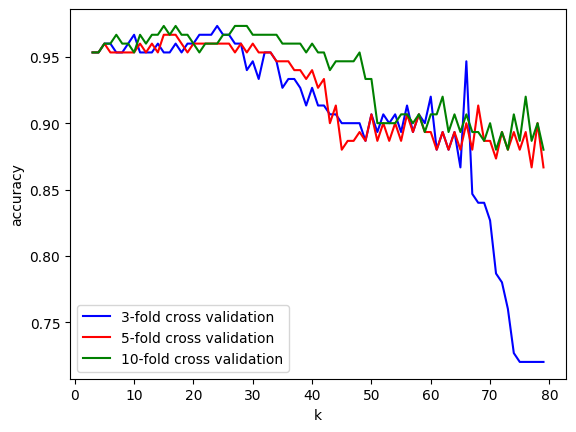

In [6]:
# Fatih Baskın
# 150210710

# creating values in range 3,80
knn_x_graph = np.arange(3,80, dtype=int)

# calculating 3-fold, 5-fold and 10-fold cross validation accuracies with k values above
knn_fold_3 = np.zeros(knn_x_graph.shape)
knn_fold_5 = np.zeros(knn_x_graph.shape)
knn_fold_10 = np.zeros(knn_x_graph.shape)

for i in range(knn_x_graph.shape[0]):
    x_i = knn_x_graph[i]
    knn_fold_3[i] = knn_classifier_with_cv(X_iris_normalized, y_iris, x_i, 3)
    knn_fold_5[i] = knn_classifier_with_cv(X_iris_normalized, y_iris, x_i, 5)
    knn_fold_10[i] = knn_classifier_with_cv(X_iris_normalized, y_iris, x_i, 10)

# constructing plot
plt.plot(knn_x_graph, knn_fold_3, c='blue', label='3-fold cross validation')
plt.plot(knn_x_graph, knn_fold_5, c='red', label='5-fold cross validation')
plt.plot(knn_x_graph, knn_fold_10, c='green', label='10-fold cross validation')
plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

#### Discussions

The classification's accuracy peaks when k is sufficiently big enough. This is especially beneficial for the samples near the border of two or more classes. 

On the contrary, if the k value starts to get larger than a certain extend, it starts to include other classes in KNN and it might cause wrong answers.

Both cases can be seen from the table above. When the k=15, accuracy peaks for 5-fold and 10-fold cross validations. But its accurracy will start to reduce as k increases.


## Problem 6 (15 Points)

Implement a multivariate classification model using the Iris dataset and evaluate its performance. Use logistic regression as the classification model.

**Steps:**

1. Train and evaluate the model. You can specify train ratio. (5 points)
2. Calculate and report classification metrics such as accuracy, precision, recall, and F1-score to assess the model's performance. (5 points)
3. Discuss the results. (5 points)

In [7]:
# Sigmoid function for logistics regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def logistic_regression_classifier(X, y,  train_ratio=0.8):
    accuracy, precision, recall, f1 = 0.0, 0.0, 0.0, 0.0,

    true_positives, false_positives, false_negatives, true_negatives, total_predictions = 0.0, 0.0, 0.0, 0.0, 0.0

    # The function assesses whether it is class 0 or not, class 1 or not, class 2 or not
    # There are 3 logistic regression trained, for classes 0, 1, 2

    # then the true positives, false positives, false negatives and true negatives are assessed for the each class

    # dimensions
    n = X.shape[0]
    d = X.shape[1]

    # 5 fold cross validation
    num_folds = 5
    for fold in range(num_folds):
        # 1 fold for testing, 4 folds for training
        # not a cross validation
        test_data_sample = X[fold:n:num_folds, :]
        test_target_sample = y[fold:n:num_folds, :]

        # Number of test samples
        test_samples_num = test_data_sample.shape[0]

        # Remaining data sample will be used for training.
        mask = np.ones(n, bool)
        for i in range(fold, n, num_folds):
            mask[i] = 0
        training_data_sample = X[mask]
        training_target_sample = y[mask]

        training_samples_num = training_data_sample.shape[0]

        # Logistics regression is for binomial classification, I will train three models
        # Each for having class 1 or class 0
        training_target_class_0 = np.where(training_target_sample == 0, 1, 0)
        test_target_class_0 = np.where(test_target_sample == 0, 1, 0)

        training_target_class_1 = np.where(training_target_sample == 1, 1, 0)
        test_target_class_1 = np.where(test_target_sample == 1, 1, 0)

        training_target_class_2 = np.where(training_target_sample == 2, 1, 0)
        test_target_class_2 = np.where(test_target_sample == 2, 1, 0)

        # Logistics regression variables for all classes
        theta_vector_class_0 = np.zeros((d, 1))
        b_0 = 0.0
        theta_vector_class_1 = np.zeros((d, 1))
        b_1 = 0.0
        theta_vector_class_2 = np.zeros((d, 1))
        b_2 = 0.0

        # sigmoid function = 1 / (1 + e^(-z))
        # z = X theta + b

        # iteration count for logistics regression is 100
        for iteration in range(100):
            # calculate z_0 for all classes
            z_0 = np.dot(training_data_sample, theta_vector_class_0) + b_0
            z_1 = np.dot(training_data_sample, theta_vector_class_1) + b_1
            z_2 = np.dot(training_data_sample, theta_vector_class_2) + b_2

            # calculate sigmoid function for all classes
            sigmoid_0 = sigmoid(z_0)
            sigmoid_1 = sigmoid(z_1)
            sigmoid_2 = sigmoid(z_2)

            # calculate errors
            error_0 = sigmoid_0 - training_target_class_0
            error_1 = sigmoid_1 - training_target_class_1
            error_2 = sigmoid_2 - training_target_class_2

            # sum of all errors will give the derivative of b
            # normalizing with the number of samples
            d_b_0 = error_0.sum(axis=0) / training_samples_num
            d_b_1 = error_1.sum(axis=0) / training_samples_num
            d_b_2 = error_2.sum(axis=0) / training_samples_num

            # multiply each value of error with each value of x
            # will be used to calculate
            # (4 x 120) (120 x 1)
            d_theta_0 = np.dot(np.transpose(training_data_sample), error_0)
            d_theta_1 = np.dot(np.transpose(training_data_sample), error_1)
            d_theta_2 = np.dot(np.transpose(training_data_sample), error_2)

            # updating the constant b
            b_0 = b_0 - (train_ratio * d_b_0)
            b_1 = b_1 - (train_ratio * d_b_1)
            b_2 = b_2 - (train_ratio * d_b_2)

            # updating the feature coefficients theta

            theta_vector_class_0 = theta_vector_class_0 - \
                (train_ratio * d_theta_0)
            theta_vector_class_1 = theta_vector_class_1 - \
                (train_ratio * d_theta_1)
            theta_vector_class_2 = theta_vector_class_2 - \
                (train_ratio * d_theta_2)

        for test_index in range(test_samples_num):
            test_element = test_data_sample[test_index]
            # z = theta0*x0 + theta1*x1 + .. + thetad0*xd + b 
            z_0 = np.dot(test_element, theta_vector_class_0) + b_0
            z_1 = np.dot(test_element, theta_vector_class_1) + b_1
            z_2 = np.dot(test_element, theta_vector_class_2) + b_2

            # calculate sigmoids
            sigmoid_0 = sigmoid(z_0)
            sigmoid_1 = sigmoid(z_1)
            sigmoid_2 = sigmoid(z_2)

            # assess the guesses for class 0
            if test_target_class_0[test_index] == 1:
                if sigmoid_0 > 0.5:
                    # it is the class and test is the class
                    true_positives += 1
                else:
                    # it is the class but test is not the classs
                    false_negatives += 1
            elif test_target_class_0[test_index] == 0:
                if sigmoid_0 > 0.5:
                    # it is not the class but test is the class
                    false_positives += 1
                else:
                    # it is not the class and test is not the class
                    true_negatives += 1
            total_predictions += 1

            # assess the guesses for class 1
            if test_target_class_1[test_index] == 1:
                if sigmoid_1 > 0.5:
                    # it is the class and test is the class
                    true_positives += 1
                else:
                    # it is the class but test is not the classs
                    false_negatives += 1
            elif test_target_class_1[test_index] == 0:
                if sigmoid_1 > 0.5:
                    # it is not the class but test is the class
                    false_positives += 1
                else:
                    # it is not the class and test is not the class
                    true_negatives += 1
            total_predictions += 1

            # assess the guesses for class 1
            if test_target_class_2[test_index] == 1:
                if sigmoid_2 > 0.5:
                    # it is the class and test is the class
                    true_positives += 1
                else:
                    # it is the class but test is not the classs
                    false_negatives += 1
            elif test_target_class_2[test_index] == 0:
                if sigmoid_2 > 0.5:
                    # it is not the class but test is the class
                    false_positives += 1
                else:
                    # it is not the class and test is not the class
                    true_negatives += 1
            total_predictions += 1

    accuracy = (true_positives + true_negatives) / total_predictions
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * precision * recall / (precision + recall)

    return accuracy, precision, recall, f1

In [8]:
train_ratios = [0.1, 0.2, 0.4, 0.8]

for t_ratio in train_ratios:
    accuracy, precision, recall, f1 = logistic_regression_classifier(X_iris_normalized, y_iris, t_ratio)
    print(f"For train ratio {t_ratio} the results are:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")

For train ratio 0.1 the results are:
  Accuracy: 0.8244444444444444
  Precision: 0.6698564593301436
  Recall: 0.9333333333333333
  F1 Score: 0.7799442896935932
For train ratio 0.2 the results are:
  Accuracy: 0.7844444444444445
  Precision: 0.6606060606060606
  Recall: 0.7266666666666667
  F1 Score: 0.6920634920634922
For train ratio 0.4 the results are:
  Accuracy: 0.7911111111111111
  Precision: 0.6794871794871795
  Recall: 0.7066666666666667
  F1 Score: 0.6928104575163399
For train ratio 0.8 the results are:
  Accuracy: 0.76
  Precision: 0.63125
  Recall: 0.6733333333333333
  F1 Score: 0.6516129032258063


#### Results

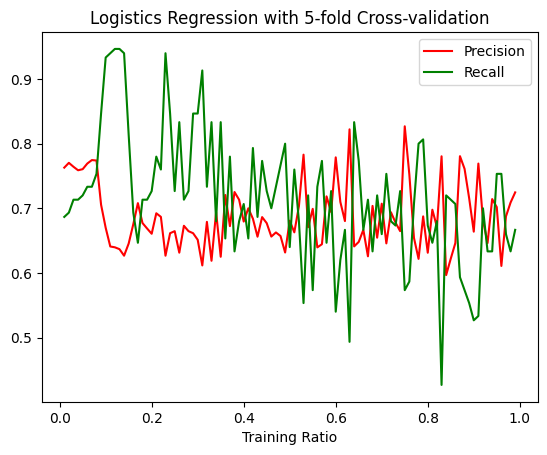

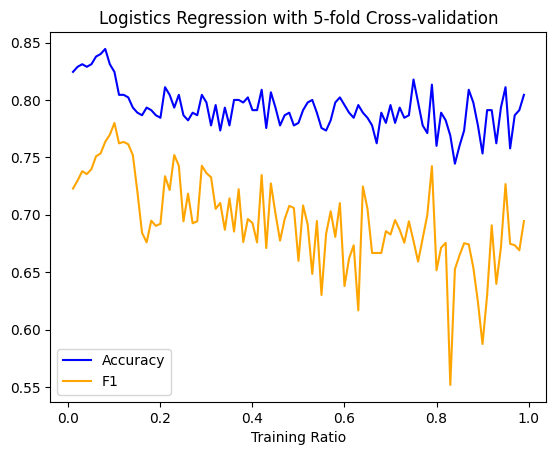

In [9]:
# Plot the results for different train ratios
train_ratios = np.arange(0.01, 1, 0.01, dtype=float)
accuracies = np.zeros_like(train_ratios)
precisions = np.zeros_like(train_ratios)
recalls =  np.zeros_like(train_ratios)
f1s = np.zeros_like(train_ratios)

# get the values for different ratios
for index in range(len(train_ratios)):
    t_ratio = train_ratios[index]
    accuracy, precision, recall, f1 = logistic_regression_classifier(X_iris_normalized, y_iris, t_ratio)
    accuracies[index] = accuracy
    precisions[index] = precision
    recalls[index] = recall
    f1s[index] = f1
    
# plotting presicions and recalls
plt.plot(train_ratios, precisions, c="red", label="Precision")
plt.plot(train_ratios, recalls, c="green", label="Recall")
plt.xlabel("Training Ratio")
plt.title("Logistics Regression with 5-fold Cross-validation")
plt.legend(loc="best")
plt.show()


# Plotting accuracy and f1 score
plt.plot(train_ratios, accuracies, c="blue", label="Accuracy")
plt.plot(train_ratios, f1s, c="orange", label="F1")
plt.xlabel("Training Ratio")
plt.title("Logistics Regression with 5-fold Cross-validation")
plt.legend(loc="best")
plt.show()

#### Discussions

Since the logistic regression is for binomial classification, for classifying between two classes, I used a different method to classify with three classes. I have trained three linear regressions, classifying class 0 or not, class 1 or not, class 2 or not respectively. I summed all classes true positives, true negatives, false positives and false negatives. Then the metrics Accuracy, F1, Precision and Recall is calculated:
* Accuracy = $\frac{true\ positives + true\ negatives}{total\ predictions}$

* Precision = $\frac{true\ positives}{true\ positives + false\ positives}$

* Recall = $\frac{true\ positives}{true\ positives + false\ negatives}$

* F1 = $\frac{2 \times Precision \times Recall}{Precision + Recall}$

The training is done using gradient descent in 100 iterations and with 5-fold cross-validation. As you can see in the tables above, the variance of all performance metrics are very high. But the overall trend is on the subtle decrease as the training ratio increases. It is learly visible in F1 metric. It might be due to values oscillating too much as training ratio increases. And F1 metric is also oscillating too much as training ratio increases.

This trend shows that the equation used for regression is not sufficient enough and some new features must be derived from the data, such as products of variables or powers of variables. But there is always the risk of overfitting.

## Problem 7 (20 Points)

Implement Principal Component Analysis (PCA) in Python for dimensionality reduction. Additionally, incorporate cross-validation to evaluate the performance of PCA for different numbers of principal components. You will use the Digits dataset given below.

**Steps:**

1. Implement the PCA algorithm and use k-fold cross-validation to assess the impact of the number of principal components on the model's performance. (5 points)
2. Calculate and report the average performance metric (e.g., mean squared error) across the cross-validation folds for each choice of the number of principal components. (5 points)
3. Calculate and report the percentage of variance explained after applying PCA. (5 points)
4. Discuss the trade-off between dimensionality reduction and model performance. (5 points)

In [10]:
# Fatih Baskın
# 150210710

from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()

X_digits = digits.data[:, 0:64]
y_digits = np.atleast_2d(digits.target).reshape(-1, 1)

# Data normalization
# minimums of each columns
mins = X_digits.min(axis=0)

# maximums of each columns
maxs = X_digits.max(axis=0)

# 150 rows containing minimums of each column
min_matrix = np.atleast_2d(mins).repeat(repeats=X_digits.shape[0], axis=0)

# 150 rows containing maxs - mins of each column
max_min_matrix = np.atleast_2d(maxs - mins).repeat(repeats=X_digits.shape[0], axis=0)

# We need to normalize the data since euclidean distance would be faulty.
# 0 <= (x_i - min) / (max - min) <=
X_digits_normalized = np.divide((X_digits - min_matrix), max_min_matrix, where=max_min_matrix!=0)


In [11]:
# Fatih Baskın
# 150210710

def pca_with_cv(X, y, num_components, num_folds=5):
    mse_scores = []

    # getting the dimensions
    n = X.shape[0]
    # d = X.shape[1]
    
    for fold in range(num_folds):
        # In each iteration, elements with indexes 0,5,10.. or 1,6,11 or 2,7,12.. will be chosen as test sample.
        test_data_sample = X[fold:n:num_folds, :]
        test_target_sample = y[fold:n:num_folds, :]

        # Number of test samples
        test_samples_num = test_data_sample.shape[0]

        # Remaining data sample will be used for training.
        mask = np.ones(n, bool)
        for i in range(fold, n, num_folds):
            mask[i] = 0
        training_data_sample = X[mask]
        training_target_sample = y[mask]

        training_sample_num = training_data_sample.shape[0]

        # Eigenvalues of the covariance matrix is used for the PCA
        xTx = np.dot(np.transpose(training_data_sample), training_data_sample)
        eigenvalues, eigenvectors = np.linalg.eigh(xTx)

        # Sorting eigenvector and values in the descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:, idx]
        eigenvalues = eigenvalues[idx]

        components = eigenvectors[:, 0:num_components]
        training_reduced = np.dot(training_data_sample, components)
        test_reduced = np.dot(test_data_sample, components)

        # Using KNN to evauluate:

        # Errors of the test samples
        error = 0

        # find k nearest neighbour of each test sample from the training sample.
        for i in range(test_samples_num):
            # each row having the squared numbers of elements
            # to calculate the euclidean distance
            test_row_matrix = np.atleast_2d(
                test_reduced[i]).repeat(training_sample_num, axis=0)
            squared_differances = np.square(
                test_row_matrix - training_reduced)
            squared_differances_sum = np.sum(squared_differances, axis=1)
            euclidean_distance = np.sqrt(squared_differances_sum)

            # merge with class labels
            distance_class = np.c_[euclidean_distance, training_target_sample]

            # sort by distances
            distance_class = distance_class[distance_class[:, 0].argsort()]

            # select nearest 50 and map their frequencies
            freq = {}
            for ki in range(0, 50):
                ki_class = distance_class[ki][1]
                if ki_class in freq:
                    freq[ki_class] += 1
                else:
                    freq[ki_class] = 1

            # predicted class is the key with max frequency
            prediction = max(freq, key=freq.get)

            # if prediction is not equal to error, add 1 to error
            error += prediction != test_target_sample[i][0]

        # adding the mean squarred error
        mse_scores.append(error**2/test_samples_num)
    
    avg_mse = sum(mse_scores) / len(mse_scores)
    return avg_mse

In [12]:
# Fatih Baskın
# 150210710

# MIGHT REQUIRE YOU TO RESTART JUPYTER NOTEBOOK KERNEL IF THE VALUES REPEAT

pca_component = [2,4,8,16,32,64]
pca_fold = [3,5,10]

for f in pca_fold:
    for c in pca_component:
        avg_mse = pca_with_cv(X_digits_normalized, y_digits, c, f)
        # Might require you to restart jupyter kernel, there is a bug that it repeats the same values.
        print(f"Average MSE with {c} principal components with {f}-fold cross-validation: {avg_mse}")



Average MSE with 2 principal components with 3-fold cross-validation: 191.89760712298275
Average MSE with 4 principal components with 3-fold cross-validation: 33.23817473567056
Average MSE with 8 principal components with 3-fold cross-validation: 5.50361713967724
Average MSE with 16 principal components with 3-fold cross-validation: 2.286588759042849
Average MSE with 32 principal components with 3-fold cross-validation: 1.7840845854201446
Average MSE with 64 principal components with 3-fold cross-validation: 1.89259877573734
Average MSE with 2 principal components with 5-fold cross-validation: 113.70193593314761
Average MSE with 4 principal components with 5-fold cross-validation: 19.87322036521201
Average MSE with 8 principal components with 5-fold cross-validation: 3.091918910554008
Average MSE with 16 principal components with 5-fold cross-validation: 1.154192200557103
Average MSE with 32 principal components with 5-fold cross-validation: 1.0684710615908388
Average MSE with 64 princ

#### Results

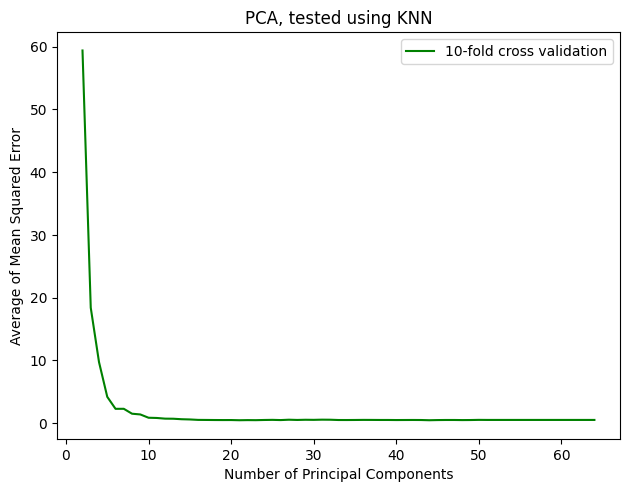

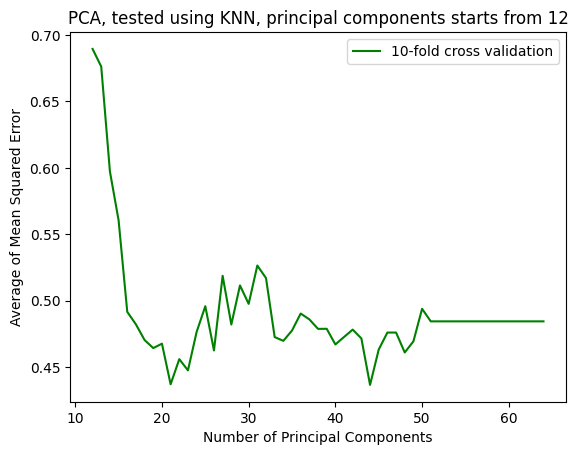

In [13]:
# Fatih Baskın
# 150210710

# MIGHT REQUIRE YOU TO RESTART JUPYTER NOTEBOOK KERNEL IF THE VALUES REPEAT

# creating values in range 2, 65 (ends with 64)
pca_component_range = np.arange(2,65, dtype=int)

# calculating 3-fold, 5-fold and 10-fold cross validation accuracies with k values above
pca_fold_10 = np.zeros_like(pca_component_range, dtype= float)

for i in range(pca_component_range.shape[0]):
    c = pca_component_range[i]
    pca_fold_10[i] = pca_with_cv(X_digits_normalized, y_digits, c, 10)

# constructing plot
plt.plot(pca_component_range, pca_fold_10, c='green', label='10-fold cross validation')
plt.xlabel("Number of Principal Components")
plt.ylabel("Average of Mean Squared Error")
plt.legend(loc='best')
plt.tight_layout()
plt.title("PCA, tested using KNN")
plt.show()

plt.plot(pca_component_range[10:63], pca_fold_10[10:63], c='green', label='10-fold cross validation')
plt.xlabel("Number of Principal Components")
plt.ylabel("Average of Mean Squared Error")
plt.legend(loc='best')
plt.title("PCA, tested using KNN, principal components starts from 12")
plt.show()




There is a sharp decrease in the average mean squared error (avgMSE) as number of principle components goes to 10. The avgMSE is minimum around when number of principal components is around 20 or 45.

#### Variance

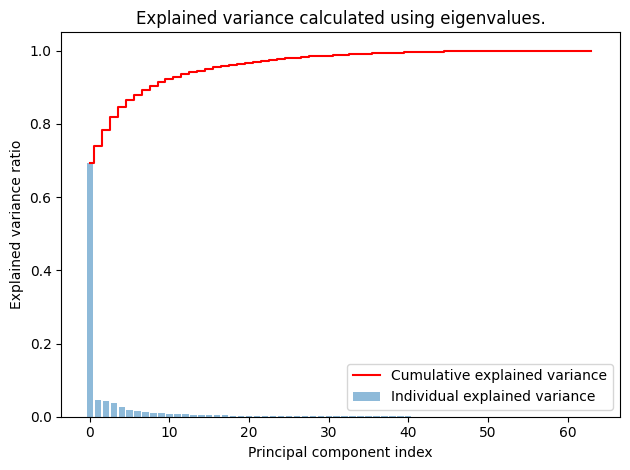

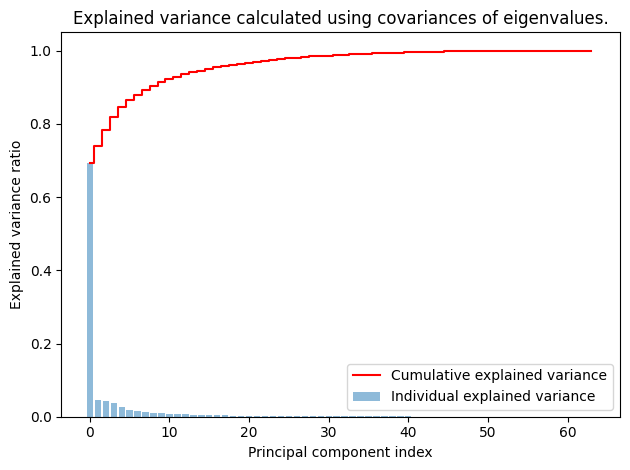

In [14]:
# Eigenvalues of the covariance matrix is used for the PCA
xTx = np.dot(np.transpose(X_digits_normalized), X_digits_normalized)
eigenvalues, eigenvectors = np.linalg.eigh(xTx)

# Sorting eigenvector and values in the descending order
idx = eigenvalues.argsort()[::-1]
eigenvectors = eigenvectors[:, idx]
eigenvalues = eigenvalues[idx]

# Total of eigenvalues
total_eigenvalues = sum(eigenvalues)

# Cumulative sum of the eigenvalues
prefix_eigenvalues = np.zeros_like(eigenvalues)
prefix_eigenvalues[0] = eigenvalues[0]
for i in range(1, prefix_eigenvalues.shape[0]):
    prefix_eigenvalues[i] = prefix_eigenvalues[i - 1] + eigenvalues[i]

eigenvalues_ratios = eigenvalues/total_eigenvalues
prefix_eigenvalues /= total_eigenvalues

# Plot is taken from the website: https://vitalflux.com/pca-explained-variance-concept-python-example/
plt.bar(range(0, len(eigenvalues_ratios)), eigenvalues_ratios, alpha=0.5,
        align='center', label='Individual explained variance')
plt.step(range(0, len(prefix_eigenvalues)), prefix_eigenvalues,
         c='red', where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title("Explained variance calculated using eigenvalues.")
plt.tight_layout()
plt.show()


# way 2, calculating the variance explained by ||XwwT||^2 / ||X||^2
# Square norm of covariance of selected components and data sample divided by Square norm of the data sample
matrix_variance = np.linalg.norm(X_digits_normalized)**2
component_variance = np.zeros_like(eigenvalues)
component_variance_cumulative = np.zeros_like(eigenvalues)

for i in range(eigenvalues.shape[0]):
    # calculating for cumulative
    w = eigenvectors[:, 0:i+1]
    w_covariance = np.dot(w, np.transpose(w))
    component_variance_cumulative[i] = np.linalg.norm(np.dot(X_digits_normalized, w_covariance))**2 / matrix_variance
    # calculating for individual
    w_i = eigenvectors[:, i:i+1]
    w_i_covariance = np.dot(w_i, np.transpose(w_i))
    component_variance[i] = np.linalg.norm(np.dot(X_digits_normalized, w_i_covariance))**2 / matrix_variance


plt.bar(range(0, len(eigenvalues_ratios)), component_variance, alpha=0.5,
        align='center', label='Individual explained variance')
plt.step(range(0, len(prefix_eigenvalues)), component_variance_cumulative,
         c='red', where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title("Explained variance calculated using covariances of eigenvalues.")
plt.tight_layout()
plt.show()


#### Discussion

Firstly, the matrix is normalized by using this formula: $x_{i,j}\ normalized = \frac{x_{i,j} - min_j}{max_j - min_j}$. By this way, every item is normalized between 0 and 1.

The PCA's performance is tested by KNN, the classification is done using the PCA reduced matrix. In each wrong prediction, the error is incremented and in the end, $\frac{error^2}{total\ predictions}$ is used as mean squarred error.

From the graphic in the section 7.2, you can see that the accuracy of the model increases drastically (i.e. error gets lower). But after a certain point (in our case, number of principle components is around 10) the point of diminishing returns start. As we add more components, the error is reduced but very slightly. On the other hand, computational cost increases drastically with each column added, since doing a matrix multiplication has about $O(n^3)$ time complexity.

Average mean squared error is minimized when component count is around 20 or 45. Another thing that benefits the PCA is number of folds. When the number of folds is large, more portions of the data is used for training, this means eigenvectors represent more of the sample space. This is clearly visible in the section 7.1.

Chosing the number of principle components is really based on the design. If we want high accuracy and program's computation time is in the second priority, then chosing high number of principle components is the way to go. But if we want performance, then we should use minimal amount of principle components that yield accurate enough results.

As from the section 7.3, the variance ratio of the principle components might give some idea about chosing the amount of principle components. Since the data is composed of randomized random distribution, some extend of its variance is carried by an eigenvector. Chosing the eigenvectors with the highest individual explained variances will help with our design choice.

Other way of calculating the explained variance ratio was by using the covariance matrix of the chosen eigenvectors. If we call chosen components (eigenvectors) $W$ then the explained variance ratio (evr) would be : $evr = \frac{||X W W^T||^2}{||X||^2}$ . The results obrained by the both eigenvector and covariance method is the same.

Other benefit of using PCA is that it reduces the dimensionality, it makes it easier to visualize the data. 